# Assignment 2

A quick note to the user. It will take several minutes to compile the main gridsearch cell in this program. Just know that all the code will work, but it may take around 10 minutes to compile the entire notebook depending on the power of your computer. Also note that the parallel process are set to 8 cores currently so if you have more or fewer you can change it to the appropriate number or simply set "n_jobs=-1" to utilize all processors.

### Section 1

Load the dataset in the file named winequality-white.csv and produce at least one
table and one graph that summarize the dataset statistics. Separate the data into
training and testing datasets and set up a classification problem: predicting the
quality value (a single variable with seven classes labeled 3, 4, 5, …, 9) based on
the values of all the other variables in the file (acidity, alcohol, pH, etc.). (2 points)

In [33]:
# Importing pandas to use dataframes
import pandas as pd
# Reading the contents of "BDOShoham.csv" into a dataframe df
df = pd.read_csv("winequality-white.csv")
# Dropping all missing values inplace which directly modifies the dataframe
# (not necessary for this dataset)
df.dropna(inplace=True)
# Displaying the dataframe contents
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
# Description of the basic dataset statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [35]:
# Creating data subsets for the prediction values and the classifiers
Predictors = df.drop(columns=["quality"])
Classifier = df["quality"]

In [36]:
Predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [37]:
Classifier

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [38]:
# Importing ML libraries
from sklearn import model_selection

# Setting random seed for repeatability
seed = 2

# Splitting the data into training an testing data sets 80/20
Pred_train, Pred_test, Class_train, Class_test = model_selection.train_test_split(Predictors, Classifier, test_size=0.20, random_state=seed)

Correlation Matrix:


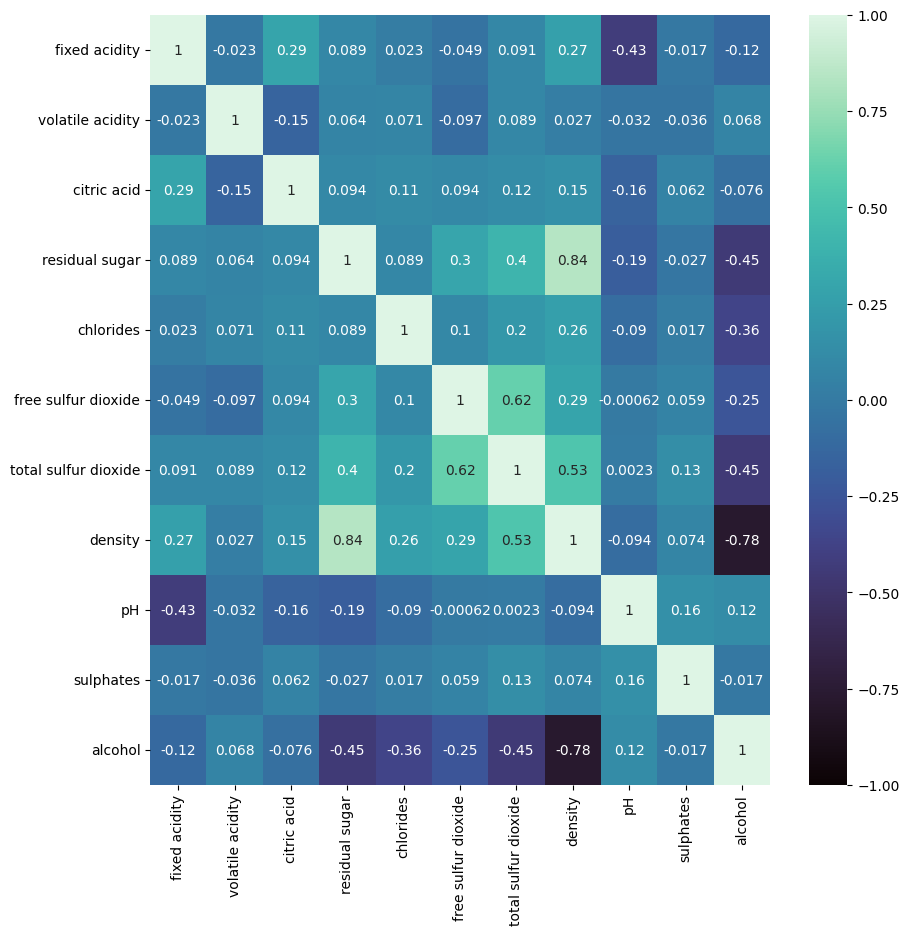

In [39]:
# Importing seaborn for plotting functionality
import seaborn as sns
# Importing pyplot for plotting functionalilty
import matplotlib.pyplot as pl

print("Correlation Matrix:")
corr = Predictors.corr()
pl.figure(figsize=(10,10))
sns.heatmap(corr, cmap="mako", annot=True, vmax=1, vmin=-1 );

### Section 2

Train and tune (via cross-validation) at least two different models; one based on
Decision Trees (e.g., DecisionTreeClassifier, RandomForestClassifier) and one
based on SVMs (e.g., different kernel SVC). (6 points)

In [40]:
# Importing various predication models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.svm import SVR

# Importing numpy for mean and std
import numpy as np

# Creating tuples with the model name and model data
Tree = ("Decision Tree",DecisionTreeClassifier(criterion="gini", splitter="best"))
Forest = ("Random Forest",RandomForestClassifier(n_estimators=100, criterion="gini"))
SVC_ = ("SVC",SVC(C=1.0, kernel="rbf", max_iter=1000))

# Making a list with all the models
models = [Tree, Forest, SVC_]

# List of the scoring methods I want results for
scoring = ["accuracy","recall_macro","f1_weighted","f1_macro"]

# Number of data folds for testing
k4folds = 5

for scoring_test in scoring:
    print(f"{scoring_test} results\n")
    for modelName, model in models:

        # Creating a CV splitter to pass into the cross_val_score
        kfold = model_selection.KFold(n_splits=k4folds, shuffle=True, random_state=seed)

        cv_results = model_selection.cross_val_score(model, Pred_train, Class_train, scoring=scoring_test, cv=kfold, n_jobs=8)

        
        print(f"{modelName}: Mean = {cv_results.mean():.6f} Std = {cv_results.std():.6f}\n")
    print("\n")

accuracy results

Decision Tree: Mean = 0.586011 Std = 0.005123

Random Forest: Mean = 0.668451 Std = 0.012938

SVC: Mean = 0.451513 Std = 0.012768



recall_macro results

Decision Tree: Mean = 0.358714 Std = 0.022352

Random Forest: Mean = 0.394315 Std = 0.022904

SVC: Mean = 0.160801 Std = 0.010988



f1_weighted results

Decision Tree: Mean = 0.585144 Std = 0.008713

Random Forest: Mean = 0.652448 Std = 0.009040

SVC: Mean = 0.304615 Std = 0.029107



f1_macro results

Decision Tree: Mean = 0.343053 Std = 0.008621

Random Forest: Mean = 0.440336 Std = 0.028918

SVC: Mean = 0.111080 Std = 0.008192





### Sections 3 & 4

Consider at least two different hyperparameter options for each model (e.g., tree
depth, regularization value C). (6 points)

Use the make_pipeline() method to study and describe the impact of feature
selection on the performance of the tuned SVM from Step 3. You can try dimension
reduction (e.g., using different n_component values for PCA) and/or data scaling
(e.g., MinMaxScaler). (6 points)

In [41]:
# Importing gridsearch to allow testing of multiple parameters at once
from sklearn.model_selection import GridSearchCV
# Importing make pipeline to allow pre-proccessing of model data
from sklearn.pipeline import make_pipeline
# Importing minmaxn scaler and PCA as pre-processing methods
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Defining tuples with model name, pipeline for model handeling, and a dict of hyperparams
# for the models and the pre-processing methods. Note the syntaxt "(pipelineprocess)__(process_params)"
Tree_grid = ("Decision Tree",make_pipeline(MinMaxScaler(),PCA(),DecisionTreeClassifier()),
             {'minmaxscaler':[None,MinMaxScaler()],
              'pca__n_components':[None,3,6],
              'decisiontreeclassifier__criterion':['gini','entropy','log_loss'],
              'decisiontreeclassifier__splitter':['best','random']})
Forest_grid = ("Random Forest",make_pipeline(MinMaxScaler(),PCA(),RandomForestClassifier()),
              {'minmaxscaler':[None,MinMaxScaler()],
               'pca__n_components':[None,3,6],
               'randomforestclassifier__n_estimators':[10,25,50,75,100,150,200],
               'randomforestclassifier__criterion':['gini','entropy','log_loss']})
SVC_grid = ("SVC",make_pipeline(MinMaxScaler(),PCA(),SVC(max_iter=10000)),
              {'minmaxscaler':[None,MinMaxScaler()],
               'pca__n_components':[None,3,6],
                'svc__C':[0.5,1.0,1.5,2.0],
               'svc__kernel':['linear','rbf']})

# Creating a list of the above tuples for use in for loop
models_grid = [Tree_grid, Forest_grid, SVC_grid]
# Creating a dict for later accessing the cv results
clf = {}

for model_name, model_g, params in models_grid:
    # Adding cv results to the dict
    clf.update({model_name:GridSearchCV(model_g, params, cv=kfold, scoring="accuracy", n_jobs=8)})
    # Fitting the models
    clf[model_name].fit(Pred_train, Class_train)
    #Printing relavant information about the best estimator for each model
    print(f"Details for {model_name}:\n")
    print(f"Best parameters set found on development set: {clf[model_name].best_params_}\n")
    print(f"Best score found on development set: {clf[model_name].best_score_:.6f}\n")
    print(f"Index of best parameters set: {clf[model_name].best_index_}\n")
    print(f"Refitting time for best model: {clf[model_name].refit_time_}s\n\n")

Details for Decision Tree:

Best parameters set found on development set: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__splitter': 'random', 'minmaxscaler': None, 'pca__n_components': None}

Best score found on development set: 0.586784

Index of best parameters set: 6

Refiting time for best model: 0.03160238265991211s


Details for Random Forest:

Best parameters set found on development set: {'minmaxscaler': None, 'pca__n_components': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 100}

Best score found on development set: 0.671007

Index of best parameters set: 4

Refiting time for best model: 1.9519116878509521s


Details for SVC:

Best parameters set found on development set: {'minmaxscaler': MinMaxScaler(), 'pca__n_components': None, 'svc__C': 1.5, 'svc__kernel': 'rbf'}

Best score found on development set: 0.573506

Index of best parameters set: 29

Refiting time for best model: 1.070430040359497s




From these results we can see that for the decision tree and random forest rescaling the data didn't improve the accuracy score. We can also see that using PCA to reduce the dimensionality reduces the accuracy score, which we would expect as data is removed from the fitting. Other insights come from the refitting time for the best model. It shows how quickly the decision tree can be fit versus the random forest and SVC. For this reason random forest and SVC could possibly benefit from the use of PCA to reduce fitting time.

### Section 4

Use the make_pipeline() method to study and describe the impact of feature
selection on the performance of the tuned SVM from Step 3. You can try dimension
reduction (e.g., using different n_component values for PCA) and/or data scaling
(e.g., MinMaxScaler). (6 points)

In [42]:
# Creating some variations of SVC for comparing MinMax and PCA results
SVC_scaled = ("SVC Scaled",make_pipeline(MinMaxScaler(),SVC(max_iter=10000)),{'svc__C':[0.5,1.0,1.5,2.0], 'svc__kernel':['linear','rbf']})
SVC_PCA = ("SVC PCA",make_pipeline(PCA(),SVC(max_iter=10000)),{'svc__C':[0.5,1.0,1.5,2.0], 'svc__kernel':['linear','rbf'],'pca__n_components':[3,6]})
SVC_scaled_PCA = ("SVC Scaled PCA",make_pipeline(MinMaxScaler(),PCA(),SVC(max_iter=10000)),{'svc__C':[0.5,1.0,1.5,2.0], 'svc__kernel':['linear','rbf'],'pca__n_components':[3,6]})

models_grid = [SVC_scaled, SVC_PCA, SVC_scaled_PCA]


for model_name, model_g, params in models_grid:

    clf.update({model_name:GridSearchCV(model_g, params, cv=kfold, scoring="accuracy", n_jobs=8)})
    clf[model_name].fit(Pred_train, Class_train)

    print(f"Details for {model_name}:")
    print(f"Best parameters set found on development set: {clf[model_name].best_params_}\n")
    print(f"Best score found on development set: {clf[model_name].best_score_:.6f}\n")
    print(f"Index of best parameters set: {clf[model_name].best_index_}\n")
    print(f"Refitting time for best model: {clf[model_name].refit_time_}s\n\n")

Details for SVC Scaled:
Best parameters set found on development set: {'svc__C': 2.0, 'svc__kernel': 'rbf'}

Best score found on development set: 0.565852

Index of best parameters set: 7

Refiting time for best model: 1.1190743446350098s


Details for SVC PCA:
Best parameters set found on development set: {'pca__n_components': 6, 'svc__C': 2.0, 'svc__kernel': 'rbf'}

Best score found on development set: 0.463254

Index of best parameters set: 15

Refiting time for best model: 0.8010106086730957s


Details for SVC Scaled PCA:
Best parameters set found on development set: {'pca__n_components': 6, 'svc__C': 1.5, 'svc__kernel': 'rbf'}

Best score found on development set: 0.545179

Index of best parameters set: 13

Refiting time for best model: 1.1966602802276611s




Choosing SVC I tested the effects of PCA and scaling. The best accuracy result came from scaling without PCA. There is a noticeable drop in the accuracy score when using PCA as is expected. It is also clear that using PCA saves some time in the refitting with approximately 30% reduction in time. Interestingly, if the data was scaled and PCA used to reduce dimensionality the refitting time was slightly longer than just scaling. This small size of this data set may not be able to reliably show the benefit of using PCA.

### Section 5

Train the DummyClassifier() on your training set and then compare the
performance of the best method you found to the DummyClassifier() using your
test set. Discuss your overall results. (2 points)

In [49]:
# Importing the dummy classifier to compare with tuned models
from sklearn.dummy import DummyClassifier

# Fitting the dummy classifier to the data
Dummy = ("Dummy Classifier",DummyClassifier().fit(Pred_train, Class_train))

# Creating tuples with the model name and best estimators
Tree_tune = ("Decision Tree Tuned",clf["Decision Tree"].best_estimator_)
Forest_tune = ("Random Forest Tuned",clf["Random Forest"].best_estimator_)
SVC_tune = ("SVC Tuned",clf["SVC"].best_estimator_)

# Making a list with all the models
models = [Dummy, Tree_tune, Forest_tune, SVC_tune]

# List of the scoring methods I want results for
scoring = ["accuracy","recall_macro","f1_weighted","f1_macro"]

# Number of data folds for testing
k4folds = 5

results = {}
# Sometimes it just not worth the effort...
names = ["Dummy Classifier","Decision Tree Tuned","Random Forest Tuned","SVC Tuned"]

for scoring_test in scoring:
    print(f"{scoring_test} results\n")

    result = []

    for modelName, model in models:

        # Creating a CV splitter to pass into the cross_val_score
        kfold = model_selection.KFold(n_splits=k4folds, shuffle=True, random_state=seed)

        cv_results = model_selection.cross_val_score(model, Pred_train, Class_train, scoring=scoring_test, cv=kfold, n_jobs=8)

        result.append(cv_results)
        
        
        print(f"{modelName}: Mean = {cv_results.mean():.6f} Std = {cv_results.std():.6f}\n")
    print("\n")

    results.update({scoring_test:result})




accuracy results

Dummy Classifier: Mean = 0.450749 Std = 0.016108

Decision Tree Tuned: Mean = 0.571209 Std = 0.012498

Random Forest Tuned: Mean = 0.661817 Std = 0.006819

SVC Tuned: Mean = 0.573506 Std = 0.008466



recall_macro results

Dummy Classifier: Mean = 0.157143 Std = 0.011664

Decision Tree Tuned: Mean = 0.350016 Std = 0.021679

Random Forest Tuned: Mean = 0.385202 Std = 0.017424

SVC Tuned: Mean = 0.269042 Std = 0.016299



f1_weighted results

Dummy Classifier: Mean = 0.280265 Std = 0.017029

Decision Tree Tuned: Mean = 0.569891 Std = 0.021860

Random Forest Tuned: Mean = 0.651183 Std = 0.006615

SVC Tuned: Mean = 0.540169 Std = 0.010068



f1_macro results

Dummy Classifier: Mean = 0.097472 Std = 0.005423

Decision Tree Tuned: Mean = 0.362880 Std = 0.022055

Random Forest Tuned: Mean = 0.427940 Std = 0.017920

SVC Tuned: Mean = 0.274400 Std = 0.015212





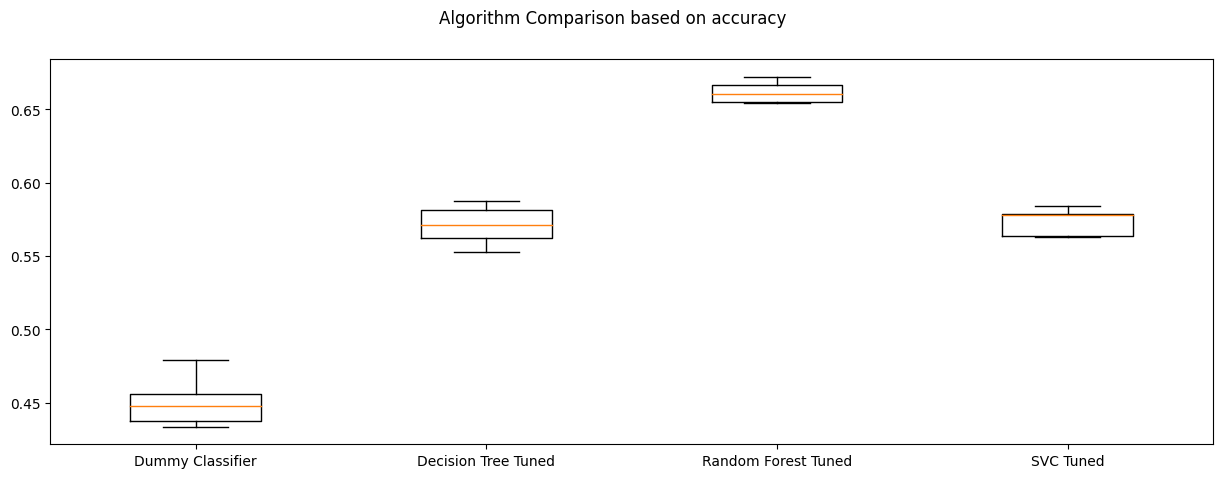

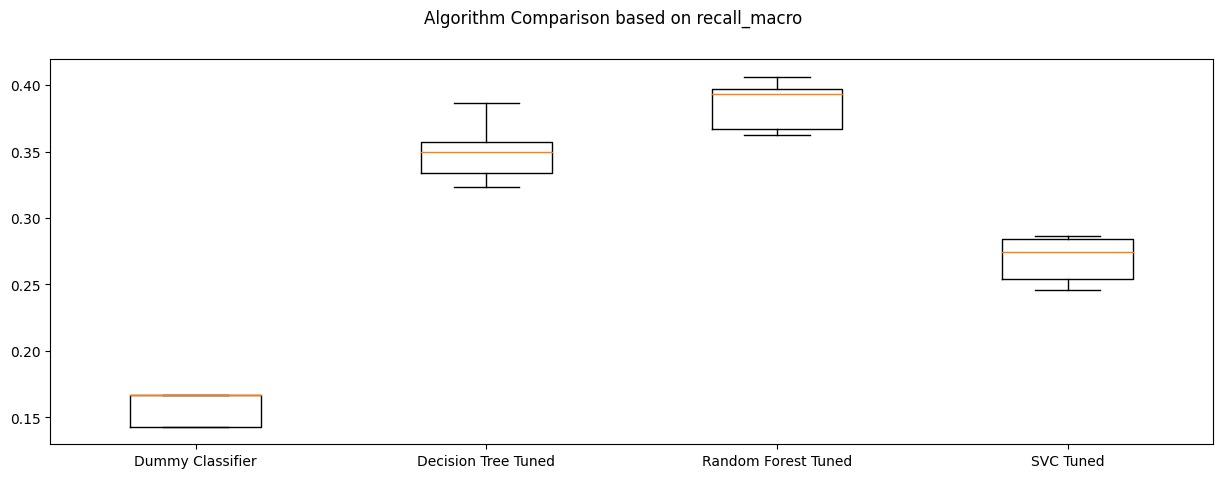

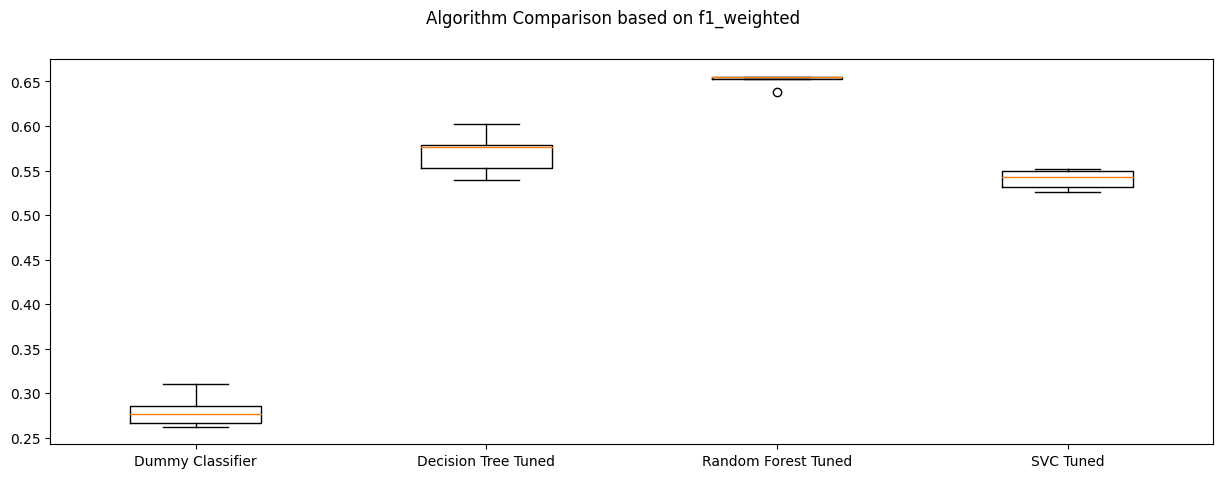

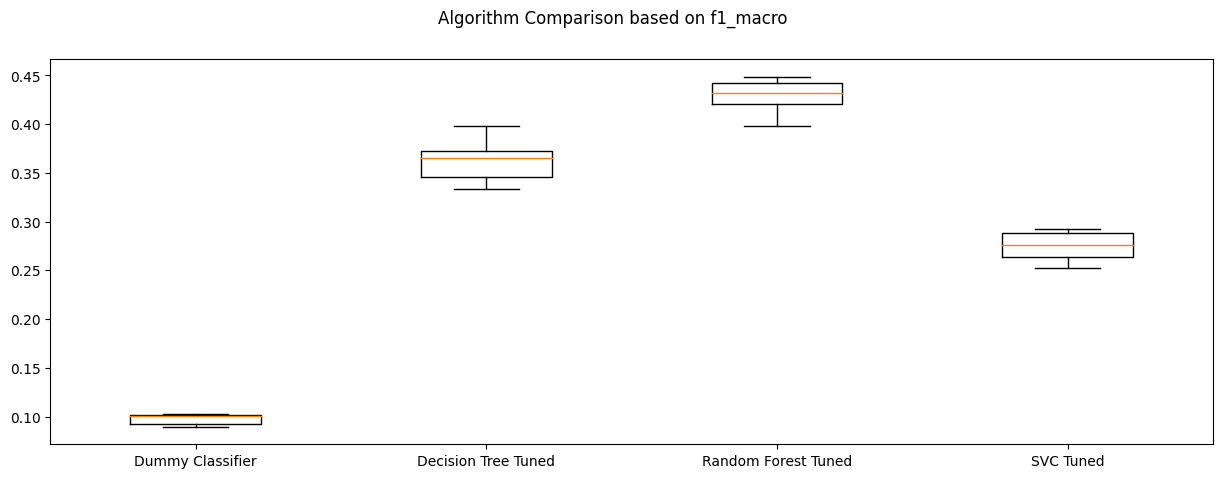

In [50]:
# Plotting Box and Whisker plots for 4 scoring methods on the best tuned models
for score_result in results:
    fig = pl.figure(figsize=(15,5))
    fig.suptitle('Algorithm Comparison based on %s' % score_result)
    ax = fig.add_subplot(111)
    pl.boxplot(results[score_result])
    ax.set_xticklabels(names)
    pl.show()

It's obvious from the above figures that the tuned models outperformed the dummy classifier as they all scored a minimum of 10 points higher. Overall, the tuned random forest model was the best preforming across the several scoring methods, but did take substantially longer than the decision tree to fit.